In [1]:
using QuantumOptics
using NBInclude
using Einsum
using DataFrames
using LinearAlgebra
using Plots
# lattice
@nbinclude("Lattice_Basis_Neighbors_Hops.ipynb"; regex=r"#.*executeme")
# mb tools
@nbinclude("QOJulia_utils.ipynb")
# chern 
@nbinclude("Chern_utils.ipynb")

calc_all_states_H_mb_2 (generic function with 1 method)

In [2]:
param_dict=Dict{}()

LL = [3,3]
N = LL[1]*LL[2]
vv_lattice = [ [1., 0], [0, 1.] ]
b1=[0, 0]
vv_basis = [b1]
param_dict["N"] = LL[1]*LL[2]

param_dict["LL"] = LL
param_dict["vv_lattice"] = vv_lattice
param_dict["vv_basis"] = vv_basis

nb = 1 # number of basis
t=-1 # hopping amplitude
p=2
q=5
ϕ=p/q # magnetic flux per plaquet
param_dict["gauge"] = "Landau"
param_dict["t"]=t
param_dict["ϕ"]=ϕ
θθ = [0, 0] # initial values for twist angles
param_dict["θθ"]=θθ

sites, site_coord, site_number = get_sites(LL, vv_lattice, vv_basis);
param_dict["sites"] = sites
param_dict["site_coord"] = site_coord
param_dict["site_number"] = site_number

pbc=true # periodic boundary condition
param_dict["pbc"] = pbc
neighbors = [ [1, 0, 1], [-1, 0, 1], [0, 1, 1], [0, -1, 1]  ]
neighbors_list = [ neighbors ]
param_dict["neighbors_list"] = neighbors_list


1-element Vector{Vector{Vector{Int64}}}:
 [[1, 0, 1], [-1, 0, 1], [0, 1, 1], [0, -1, 1]]

In [3]:
basis = NLevelBasis(N) 
param_dict["basis"] = basis;

In [4]:
param_dict["model_H1"] = get_Hofstadter_hamiltonian
H_T = get_Hofstadter_hamiltonian(param_dict)
H1 = get_sp_op(basis, H_T);

In [32]:
PN = 3
param_dict["PN"] = PN
basis_mb = get_basis_mb(param_dict)

ManyBody(onebodybasis=NLevel(N=9), states:165)

In [33]:
H1_mb = get_mb_op(basis_mb, H1);
param_dict["dimH_mb"] = length(basis_mb)
H_NI_mb = get_H_mb(param_dict);

In [34]:
E_NI, U_NI = eigenstates(dense(H_NI_mb));

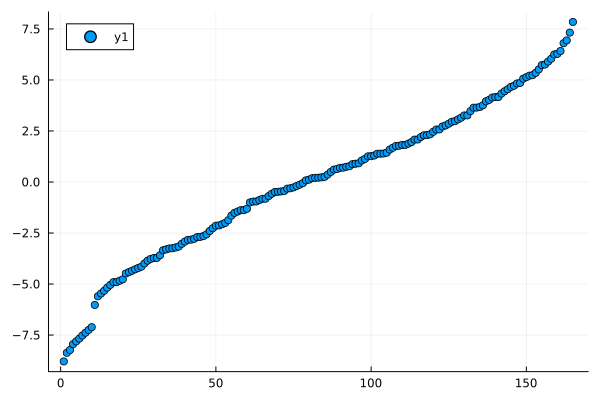

In [35]:
scatter(E_NI)

In [36]:
E_NI[1:16]

16-element Vector{Float64}:
 -8.792404800518268
 -8.369031375168513
 -8.232745244439757
 -7.9456579498187665
 -7.809371819090002
 -7.67308568836124
 -7.522284524469029
 -7.385998393740259
 -7.2497122630114905
 -7.11342613228272
 -6.024565057123043
 -5.601191631773295
 -5.464905501044525
 -5.331900261365133
 -5.177818206423547
 -5.041532075694775

In [37]:
subspace_proj, P, Pt = get_projector_op(basis_mb, U_NI[1:15]);

In [38]:
param_dict["U"] = 1
H_Int = get_Int_Part(N, basis_mb, param_dict["U"]);

In [46]:
basis_mb.occupations[3]

9-element Vector{Int64}:
 2
 0
 1
 0
 0
 0
 0
 0
 0

In [47]:
dense(H_Int).data[3,3]

1.0 + 0.0im

In [ ]:
H_MB = H_Int + H_NI_mb;

In [13]:
EE_MB, UU_MB = eigenstates(dense(H_MB))
EE_MB[1:15] - E_NI[1:15]

LoadError: UndefVarError: E_NI not defined

In [53]:
H_Int_proj = get_subspace_op(H_Int, P, Pt);

In [54]:
H_Int_proj = (H_Int_proj'+H_Int_proj)/2
E_proj_Int, U_proj_Int = eigenstates(dense(H_Int_proj));
E_proj_Int

15-element Vector{Float64}:
 0.00047745751406262914
 0.00047745751406263163
 0.00047745751406263353
 0.0004774575140626342
 0.00047745751406263895
 0.00125
 0.0012500000000000007
 0.0012500000000000026
 0.001250000000000003
 0.0012500000000000057
 0.0032725424859373665
 0.00327254248593737
 0.0032725424859373713
 0.0032725424859373726
 0.003272542485937374